In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#### Install TensorFlow2

https://www.tensorflow.org/install/


In [ ]:
#!pip install --upgrade pip # Requires pip version > 19.0
#!pip install tensorflow

#### TensorFlow imports

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Lambda

tf.random.set_seed(42)
tf.__version__

'2.3.1'

## Tensorflow 2.X


https://www.tensorflow.org/

https://www.tensorflow.org/api_docs/python/tf/keras


Tensorflow 2, originally developed as part of Google Brain, is an open source symbolic math library for neural networks. It supports execution on CPUs, GPUs and TPUs.


It has a built-in high level specification Keras and a data visualization toolkit named TensorBoard.


In [5]:
devices = [device.name for device in tf.config.experimental.list_physical_devices()]
devices

['/physical_device:CPU:0', '/physical_device:XLA_CPU:0']

In [ ]:
tf.device(devices[1])

## TensorFlow tensors

In [7]:
x = tf.constant(1);x

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [8]:
x.numpy()

1

In [9]:
x.shape

TensorShape([])

In [10]:
m = tf.constant([[1, 2, 1], [3, 4, 2]]);m

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 1],
       [3, 4, 2]], dtype=int32)>

In [11]:
m.shape

TensorShape([2, 3])

In [12]:
ones = tf.ones([3, 3])
ones

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [13]:
zeros = tf.zeros([2, 3])
print(zeros)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [14]:
tf.reshape(zeros, [3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [15]:
tf.transpose(zeros)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [16]:
a = tf.constant(1)
b = tf.constant(1)

tf.add(a, b).numpy()

2

In [17]:
(a + b).numpy()

2

In [18]:
c = a + b
c * c

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [19]:
d1 = tf.constant([[1, 2], [1, 2]]);
d2 = tf.constant([[3, 4], [3, 4]]);

tf.tensordot(d1, d2, axes=1).numpy()

array([[ 9, 12],
       [ 9, 12]], dtype=int32)

In [20]:
norm = tf.random.normal(shape=(1000, 1), mean=0., stddev=1.)

In [21]:
unif = tf.random.uniform(shape=(1000, 1), minval=0, maxval=100)

#### Keras Model Classes

Sequential - the easiest
- Add layers to model

Model - functional interface

- Layers are like functions
- Can compose layers
- More flexible than sequential

#### Layers

Layers are the fundamental building block of keras models. 
For example:

- Input
- Dense
- Output
- Convolutional
- Pooling
- Activation
    

In [4]:
tf.executing_eagerly()

True

### Simple Linear Regression Model

In [ ]:
import sys
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

In [7]:
cars = pd.read_csv("cars.csv")
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### Convert to tensors

In [8]:
data = tf.constant(cars.values)
type(data),data.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([50, 2]))

In [9]:
X = data[:,0] # Speed
y = data[:,1] # Stopping distance
X.shape,y.shape

(TensorShape([50]), TensorShape([50]))

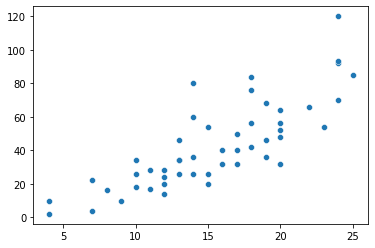

In [10]:
sns.scatterplot(X,y);

### Sequential Class Neural Network Model

https://keras.io/api/models/sequential/



#### TF2 model using sequential class in two different ways

In [11]:
# layers in a list
def seq_neural_net():
  net = tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=[1]),
    Dense(16, activation='relu'),
    Dense(1),
  ])
  return net

In [ ]:
# add layers
def seq_neural_net():
  net = tf.keras.Sequential()
  net.add(Dense(32, activation='relu', input_shape=[1]))
  net.add(Dense(16, activation='relu'))
  net.add(Dense(1))
  return net

In [12]:
net = seq_neural_net()
net

In [13]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [14]:
optimizer = tf.keras.optimizers.Adam(0.001)

net.compile(loss='mse',optimizer=optimizer, metrics=['mse', 'accuracy'])

history = net.fit(x=X, y=y,
                  shuffle=True,
                  epochs=300,
                  validation_split=0.2,
                  verbose=0)

In [15]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right');


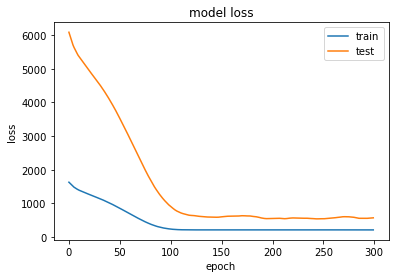

In [17]:
plot_loss(history)

In [16]:
def plot_mse(history):
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('model mse')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right');

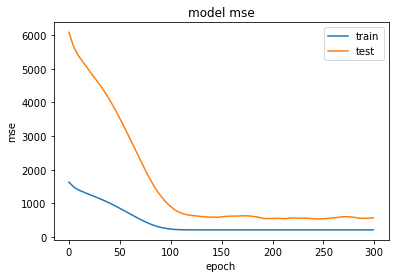

In [18]:
plot_mse(history)

In [19]:
history.history.keys()

dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])

#### Save/Restore Model

In [20]:
net.save('simple_net.h5')

In [21]:
simple_net = tf.keras.models.load_model('simple_net.h5')

#### Early Stopping

Stop training when some metric stops improving


In [22]:
early_stop = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=10
)

In [23]:
net = seq_neural_net()

net.compile(loss='mse',optimizer=optimizer, metrics=['mse', 'accuracy'])

history = net.fit(
  x=X,
  y=y,
  shuffle=True,
  epochs=1000,
  validation_split=0.2,
  verbose=0,
  callbacks=[early_stop]
)

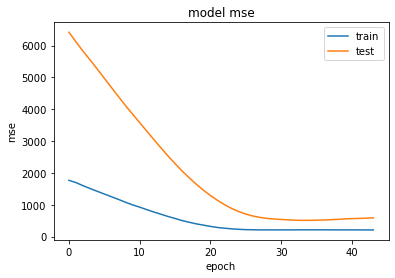

In [24]:
plot_mse(history)

### TF2 model using Model Class

Keras Functional API https://keras.io/models/model/

Layers are callable with arguments:
* input: a tensor  
* output: a tensor

Layers since they are callable can be composed and are more flexible than sequential

The Model is defined by providing input and output layers
   

In [25]:
# What it means to be callable

f = lambda x: x**2
f(5)

25

In [26]:
layer = Lambda(lambda x: x**2)
v = tf.constant(5)
w = layer(v)
w.numpy()

25

In [27]:
w

<tf.Tensor: shape=(), dtype=int32, numpy=25>

In [29]:
def model_neural_net():
    In = Input(shape=(1,))
    H1 = Dense(32, activation='relu')(In)
    H2 = Dense(16, activation='relu')(H1)
    Out = Dense(1)(H2)
    net = Model(In,Out)
    return(net)

In [30]:
net = model_neural_net()

optimizer = tf.keras.optimizers.RMSprop(0.001)

net.compile(loss='mse',optimizer=optimizer, metrics=['mse', 'accuracy'])

history = net.fit(x=X, y=y,
                  shuffle=True,
                  epochs=300,
                  validation_split=0.2,
                  verbose=0)

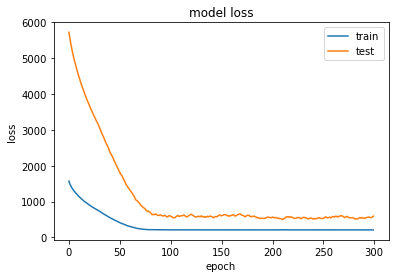

In [31]:
plot_loss(history)

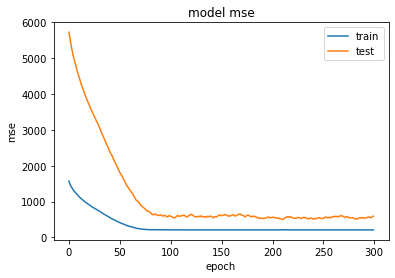

In [32]:
plot_mse(history)

### References

https://www.curiousily.com/posts/tensorflow-2-and-keras-quick-start-guide/